# Aniso Clustering

/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


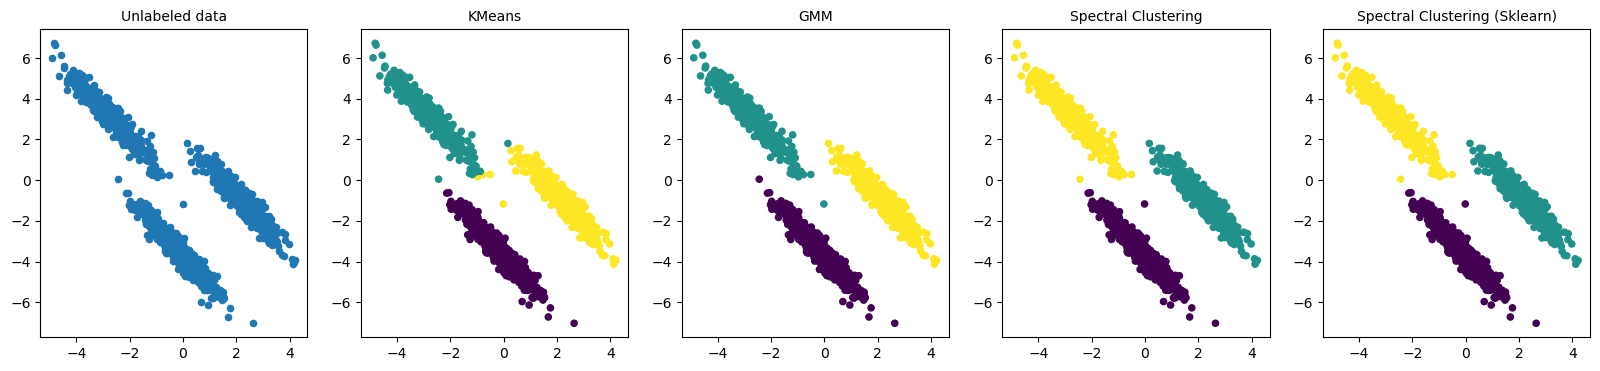

NMI for KMeans: 0.9771
NMI for GMM: 1.0000
NMI for Spectral Clustering: 0.9912
NMI for Spectral Clustering (Sklearn): 0.9912


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from scipy import linalg
from sklearn.preprocessing import normalize
from scipy.spatial import distance
from sklearn.metrics import normalized_mutual_info_score

# Data Generation      Number of samples to generate
n_samples = 1500  
random_state = 17
X, y = make_blobs(n_samples=n_samples, random_state=random_state)  
transformation = [[0.60834549, -0.63667641], [-0.40887718, 0.85253229]]  
X_aniso = np.dot(X, transformation)  
y = list(y)  

# Plot initial unlabeled data with anisotropy
plt.figure(figsize=(20, 4))
plt.subplot(151)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], s=20)
plt.title("Unlabeled data", fontsize=10)

# KMeans clustering
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)
# Plot KMeans clustering result
plt.subplot(152)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred, s=20, cmap='viridis')
plt.title("KMeans", fontsize=10)

# Gaussian Mixture Model clustering
y_pred_GMM = GaussianMixture(n_components=3, random_state=random_state).fit_predict(X_aniso)# Plot GMM clustering result
plt.subplot(153)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred_GMM, s=20, cmap='viridis')
plt.title("GMM", fontsize=10)

rbf_param = 7.6  # Set the parameter for the RBF
W = np.exp(-distance.cdist(X_aniso, X_aniso, 'sqeuclidean') / (2 * rbf_param ** 2))  # Calculate W_ij and form W matrix
D = np.diag(W.sum(axis=1))  # Calculate degree matrix for normalization

# Normalize the kernel matrix using the degree matrix
D_inv_sqrt = np.linalg.inv(np.sqrt(D))  # Calculate D^(-1/2)
M = np.dot(np.dot(D_inv_sqrt, W), D_inv_sqrt)  # Normalize the kernel matrix using the degree matrix (D^(-1/2)·W·D^(-1/2))

U = linalg.svd(M)  # Perform SVD to prepare for spectral clustering
U_subset = U[0][:, :3] 
y_pred_sc = KMeans(n_clusters=3, random_state=random_state).fit_predict(U_subset)  
y_pred_sc = list(y_pred_sc) 

# Plot custom spectral clustering result
plt.subplot(154)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred_sc, s=20, cmap='viridis')
plt.title("Spectral Clustering", fontsize=10)

# Sklearn's spectral clustering
y_pred_sc_sklearn = SpectralClustering(n_clusters=3, affinity='rbf', random_state=random_state).fit_predict(X_aniso)
plt.subplot(155)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred_sc_sklearn, s=20, cmap='viridis')
plt.title("Spectral Clustering (Sklearn)", fontsize=10)

plt.show()

# Define a function to calculate the Normalized Mutual Information score
def calculate_nmi(true_labels, cluster_labels):
    return normalized_mutual_info_score(true_labels, cluster_labels)

# Calculate and print NMI
nmi_kmeans = calculate_nmi(y, y_pred)
nmi_gmm = calculate_nmi(y, y_pred_GMM)
nmi_spec = calculate_nmi(y, y_pred_sc)
nmi_spec_sklearn = calculate_nmi(y, y_pred_sc_sklearn)

print(f"NMI for KMeans: {nmi_kmeans:.4f}")
print(f"NMI for GMM: {nmi_gmm:.4f}")
print(f"NMI for Spectral Clustering: {nmi_spec:.4f}")
print(f"NMI for Spectral Clustering (Sklearn): {nmi_spec_sklearn:.4f}")

# Iris Clustering

[[-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]
 [-1.41421356e-001]


/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'iris labelled Spectral Clustering')

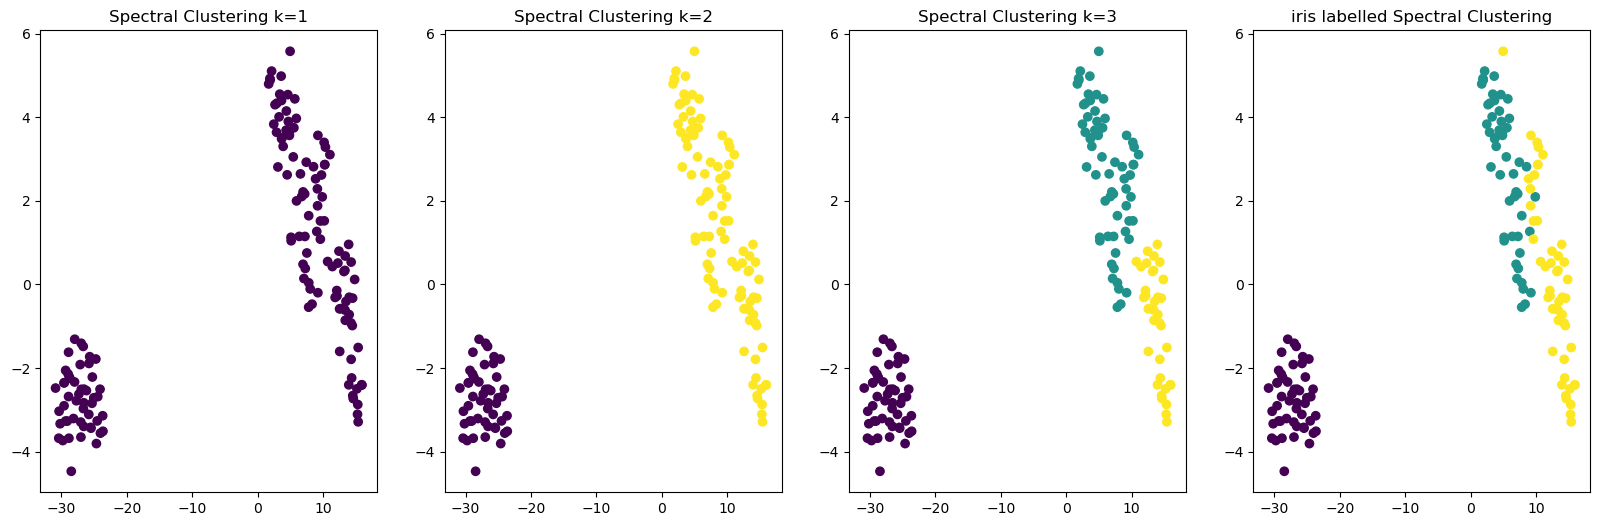

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh
from sklearn.metrics import normalized_mutual_info_score
from sklearn.manifold import TSNE

iris = load_iris()
X = iris.data
y = iris.target

tsne = TSNE(n_components=2, init='pca', random_state=random_state)  # Mapping 4-dimensional data to 2-dimensional data
X_scaled = tsne.fit_transform(X)


np.random.seed(17)


def spectral_clustering(X, n_clusters):
    dist_matrix = squareform(pdist(X, 'euclidean'))

    sim_matrix = np.exp(-dist_matrix**2 / (2 * 1**2))
  
    laplacian = np.diag(np.sum(sim_matrix, axis=1)) - sim_matrix
    
    eigenvalues, eigenvectors = eigh(laplacian)

    eigenvectors_subset = eigenvectors[:, :n_clusters]
    print(eigenvectors_subset)
    labels = KMeans(n_clusters=n_clusters, random_state=17).fit_predict(eigenvectors_subset)
    
    return labels
x
labels_spec = [None] * 4  
#for i in [1,2,3]:
for i in [1,2,3]:
    labels_spec[i] = spectral_clustering(X_scaled, n_clusters=i)

plt.figure(figsize=(20, 6))
plt.subplot(141)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_spec[1], cmap='viridis')
plt.title('Spectral Clustering k=1')
plt.subplot(142)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_spec[2], cmap='viridis')
plt.title('Spectral Clustering k=2')
plt.subplot(143)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_spec[3], cmap='viridis')
plt.title('Spectral Clustering k=3')
plt.subplot(144)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  cmap='viridis')
plt.title('Iris Original labelled Spectral Clustering')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


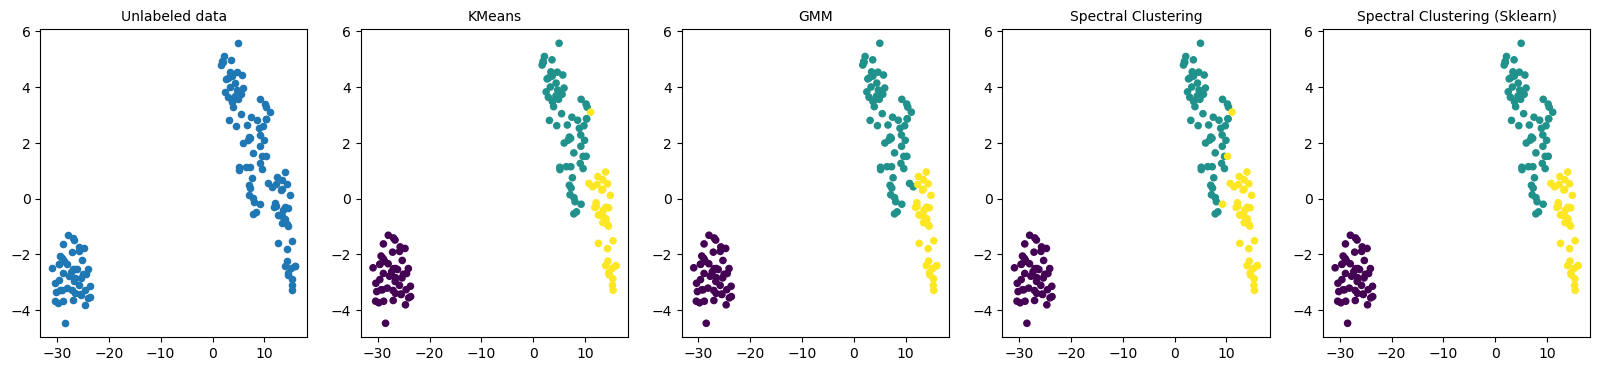

NMI for KMeans: 0.8138
NMI for GMM: 0.7907
NMI for Spectral Clustering: 0.7941
NMI for Spectral Clustering (Sklearn): 0.8057


In [46]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

random_state=17

# load the dataset
iris = load_iris()
X = iris.data
y = iris.target
print(y)

tsne = TSNE(n_components=2, init='pca', random_state=random_state)  # Mapping 4-dimensional data to 2-dimensional data
X_scaled = tsne.fit_transform(X)

# Plot initial unlabeled data with anisotropy
plt.figure(figsize=(20, 4))
plt.subplot(151)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=20)
plt.title("Unlabeled data", fontsize=10)

# KMeans clustering
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_scaled)
plt.subplot(152)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, s=20, cmap='viridis')
plt.title("KMeans", fontsize=10)

# Gaussian Mixture Model clustering
y_pred_GMM = GaussianMixture(n_components=3, random_state=random_state).fit_predict(X_scaled)
plt.subplot(153)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred_GMM, s=20, cmap='viridis')
plt.title("GMM", fontsize=10)

rbf_param = 7.6  
W = np.exp(-distance.cdist(X_scaled, X_scaled, 'sqeuclidean') / (2 * rbf_param ** 2))  # Calculate W_ij and form W matrix
D = np.diag(W.sum(axis=1))  

# Normalize the kernel matrix using the degree matrix
D_inv_sqrt = np.linalg.inv(np.sqrt(D)) 
M = np.dot(np.dot(D_inv_sqrt, W), D_inv_sqrt) 

U = linalg.svd(M)  # Perform SVD to prepare for spectral clustering
U_subset = U[0][:, :3]  # Select the top 3 eigenvectors
y_pred_sc = KMeans(n_clusters=3, random_state=random_state).fit_predict(U_subset)  
y_pred_sc = list(y_pred_sc)  # Convert the predicted cluster labels (numpy array) to a list

# Plot custom spectral clustering result
plt.subplot(154)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred_sc, s=20, cmap='viridis')
plt.title("Spectral Clustering", fontsize=10)

# Sklearn's spectral clustering
y_pred_sc_sklearn = SpectralClustering(n_clusters=3, affinity='rbf', random_state=random_state).fit_predict(X_scaled)
plt.subplot(155)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred_sc_sklearn, s=20, cmap='viridis')
plt.title("Spectral Clustering (Sklearn)", fontsize=10)

plt.show()

# Define a function to calculate the Normalized Mutual Information score
def calculate_nmi(true_labels, cluster_labels):
    return normalized_mutual_info_score(true_labels, cluster_labels)

# Calculate and print NMI
nmi_kmeans = calculate_nmi(y, y_pred)
nmi_gmm = calculate_nmi(y, y_pred_GMM)
nmi_spec = calculate_nmi(y, y_pred_sc)
nmi_spec_sklearn = calculate_nmi(y, y_pred_sc_sklearn)


print(f"NMI for KMeans: {nmi_kmeans:.4f}")
print(f"NMI for GMM: {nmi_gmm:.4f}")
print(f"NMI for Spectral Clustering: {nmi_spec:.4f}")
print(f"NMI for Spectral Clustering (Sklearn): {nmi_spec_sklearn:.4f}")